In [1]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

C:\Programs\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
X_with_columns = pd.read_pickle("pickle_files/X.pkl")
Z_with_columns = pd.read_pickle("pickle_files/Z.pkl")

columns_to_drop = []

X_with_columns.drop(columns_to_drop, axis = 1, inplace=True)
Z_with_columns.drop(columns_to_drop, axis = 1, inplace=True)

X = np.array(X_with_columns)
Y = np.array(pd.read_pickle("pickle_files/Y.pkl"))
Z = np.array(Z_with_columns)
df_next_games = pd.read_pickle("pickle_files/next_games.pkl")

In [3]:
kf = KFold(n_splits=4, random_state=0, shuffle=True)
kf.get_n_splits(X)

4

In [4]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

TRAIN: [  0   2   3   4   5   6   7   8   9  11  13  16  18  19  20  22  23  24
  25  26  27  28  29  30  32  33  34  35  36  38  39  40  41  42  43  44
  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  65
  67  68  69  70  72  73  74  76  77  79  80  81  82  83  84  86  87  88
  91  92  93  94  95  97  98  99 100 101 104 105 106 109 110 111 112 113
 114 115 116 117 119 120 121 123 124 125 126 128 129 130 131 133 135 136
 137 138 139 141 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 158 160 161 163 164 166 167 168 169 171 173 174 176 177 178 180 181 182
 183 184 187 189 191 192 193 194 195 197 198 199 201 203 204 207 209 211
 212 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 232
 234 237 238 239 240 241 242 243 244 246 248 250 251 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 269 270 273 274 275 277 280 281
 282 283 284 286 287 288 289 290 291 292 293 294 295 296 297 300 301 302
 303 304 305 307 309 310 311 312 313 314 317

## XGBoost

In [5]:
XGB_model = xgb.XGBClassifier(silent=False, 
                      learning_rate=0.005,  
                      colsample_bytree = 0.5,
                      subsample = 0.8,
                      objective='multi:softprob', 
                      n_estimators=1000, 
                      reg_alpha = 0.2,
                      reg_lambda = .5,
                      max_depth=5, 
                      gamma=5,
                      seed=82)

In [6]:
eval_set = [(X_train, y_train), (X_test, y_test)]

XGB_model.fit(X_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True)
y_pred = XGB_model.predict(X_test)
y_pred_train = XGB_model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

[21:52:36] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-merror:0.00000	validation_0-mlogloss:1.09240	validation_1-merror:0.00000	validation_1-mlogloss:1.09236
[1]	validation_0-merror:0.00000	validation_0-mlogloss:1.08506	validation_1-merror:0.00000	validation_1-mlogloss:1.08502
[2]	validation_0-merror:0.00000	validation_0-mlogloss:1.07778	validation_1-merror:0.00000	validation_1-mlogloss:1.07775
[3]	validation_0-merror:0.00000	validation_0-mlogloss:1.07138	validation_1-merror:0.00000	validation_1-mlogloss:1.07139
[4]	validation_0-merror:0.00000	validation_0-mlogloss:1.06506	validation_1-merror:0.00000	validation_1-mlogloss:1.06512
[5]	validation_0-merror:0.00000	validation_

[65]	validation_0-merror:0.00000	validation_0-mlogloss:0.75741	validation_1-merror:0.00000	validation_1-mlogloss:0.76104
[66]	validation_0-merror:0.00000	validation_0-mlogloss:0.75284	validation_1-merror:0.00000	validation_1-mlogloss:0.75645
[67]	validation_0-merror:0.00000	validation_0-mlogloss:0.74871	validation_1-merror:0.00000	validation_1-mlogloss:0.75254
[68]	validation_0-merror:0.00000	validation_0-mlogloss:0.74476	validation_1-merror:0.00000	validation_1-mlogloss:0.74877
[69]	validation_0-merror:0.00000	validation_0-mlogloss:0.74184	validation_1-merror:0.00000	validation_1-mlogloss:0.74575
[70]	validation_0-merror:0.00000	validation_0-mlogloss:0.73801	validation_1-merror:0.00000	validation_1-mlogloss:0.74193
[71]	validation_0-merror:0.00000	validation_0-mlogloss:0.73427	validation_1-merror:0.00000	validation_1-mlogloss:0.73810
[72]	validation_0-merror:0.00000	validation_0-mlogloss:0.73059	validation_1-merror:0.00000	validation_1-mlogloss:0.73440
[73]	validation_0-merror:0.00000

[133]	validation_0-merror:0.00000	validation_0-mlogloss:0.53337	validation_1-merror:0.00000	validation_1-mlogloss:0.53746
[134]	validation_0-merror:0.00000	validation_0-mlogloss:0.53080	validation_1-merror:0.00000	validation_1-mlogloss:0.53490
[135]	validation_0-merror:0.00000	validation_0-mlogloss:0.52827	validation_1-merror:0.00000	validation_1-mlogloss:0.53241
[136]	validation_0-merror:0.00000	validation_0-mlogloss:0.52529	validation_1-merror:0.00000	validation_1-mlogloss:0.52940
[137]	validation_0-merror:0.00000	validation_0-mlogloss:0.52287	validation_1-merror:0.00000	validation_1-mlogloss:0.52696
[138]	validation_0-merror:0.00000	validation_0-mlogloss:0.52043	validation_1-merror:0.00000	validation_1-mlogloss:0.52455
[139]	validation_0-merror:0.00000	validation_0-mlogloss:0.51785	validation_1-merror:0.00000	validation_1-mlogloss:0.52200
[140]	validation_0-merror:0.00000	validation_0-mlogloss:0.51587	validation_1-merror:0.00000	validation_1-mlogloss:0.52010
[141]	validation_0-merro

[201]	validation_0-merror:0.00000	validation_0-mlogloss:0.38547	validation_1-merror:0.00000	validation_1-mlogloss:0.38954
[202]	validation_0-merror:0.00000	validation_0-mlogloss:0.38447	validation_1-merror:0.00000	validation_1-mlogloss:0.38854
[203]	validation_0-merror:0.00000	validation_0-mlogloss:0.38238	validation_1-merror:0.00000	validation_1-mlogloss:0.38643
[204]	validation_0-merror:0.00000	validation_0-mlogloss:0.38031	validation_1-merror:0.00000	validation_1-mlogloss:0.38434
[205]	validation_0-merror:0.00000	validation_0-mlogloss:0.37908	validation_1-merror:0.00000	validation_1-mlogloss:0.38306
[206]	validation_0-merror:0.00000	validation_0-mlogloss:0.37747	validation_1-merror:0.00000	validation_1-mlogloss:0.38143
[207]	validation_0-merror:0.00000	validation_0-mlogloss:0.37543	validation_1-merror:0.00000	validation_1-mlogloss:0.37937
[208]	validation_0-merror:0.00000	validation_0-mlogloss:0.37340	validation_1-merror:0.00000	validation_1-mlogloss:0.37732
[209]	validation_0-merro

[269]	validation_0-merror:0.00000	validation_0-mlogloss:0.28469	validation_1-merror:0.00000	validation_1-mlogloss:0.28817
[270]	validation_0-merror:0.00000	validation_0-mlogloss:0.28319	validation_1-merror:0.00000	validation_1-mlogloss:0.28666
[271]	validation_0-merror:0.00000	validation_0-mlogloss:0.28190	validation_1-merror:0.00000	validation_1-mlogloss:0.28535
[272]	validation_0-merror:0.00000	validation_0-mlogloss:0.28042	validation_1-merror:0.00000	validation_1-mlogloss:0.28386
[273]	validation_0-merror:0.00000	validation_0-mlogloss:0.27954	validation_1-merror:0.00000	validation_1-mlogloss:0.28298
[274]	validation_0-merror:0.00000	validation_0-mlogloss:0.27808	validation_1-merror:0.00000	validation_1-mlogloss:0.28150
[275]	validation_0-merror:0.00000	validation_0-mlogloss:0.27661	validation_1-merror:0.00000	validation_1-mlogloss:0.28002
[276]	validation_0-merror:0.00000	validation_0-mlogloss:0.27551	validation_1-merror:0.00000	validation_1-mlogloss:0.27890
[277]	validation_0-merro

[337]	validation_0-merror:0.00000	validation_0-mlogloss:0.21301	validation_1-merror:0.00000	validation_1-mlogloss:0.21615
[338]	validation_0-merror:0.00000	validation_0-mlogloss:0.21212	validation_1-merror:0.00000	validation_1-mlogloss:0.21525
[339]	validation_0-merror:0.00000	validation_0-mlogloss:0.21103	validation_1-merror:0.00000	validation_1-mlogloss:0.21415
[340]	validation_0-merror:0.00000	validation_0-mlogloss:0.21016	validation_1-merror:0.00000	validation_1-mlogloss:0.21327
[341]	validation_0-merror:0.00000	validation_0-mlogloss:0.20908	validation_1-merror:0.00000	validation_1-mlogloss:0.21218
[342]	validation_0-merror:0.00000	validation_0-mlogloss:0.20840	validation_1-merror:0.00000	validation_1-mlogloss:0.21155
[343]	validation_0-merror:0.00000	validation_0-mlogloss:0.20733	validation_1-merror:0.00000	validation_1-mlogloss:0.21047
[344]	validation_0-merror:0.00000	validation_0-mlogloss:0.20652	validation_1-merror:0.00000	validation_1-mlogloss:0.20963
[345]	validation_0-merro

[405]	validation_0-merror:0.00000	validation_0-mlogloss:0.16083	validation_1-merror:0.00000	validation_1-mlogloss:0.16372
[406]	validation_0-merror:0.00000	validation_0-mlogloss:0.16022	validation_1-merror:0.00000	validation_1-mlogloss:0.16313
[407]	validation_0-merror:0.00000	validation_0-mlogloss:0.15977	validation_1-merror:0.00000	validation_1-mlogloss:0.16268
[408]	validation_0-merror:0.00000	validation_0-mlogloss:0.15925	validation_1-merror:0.00000	validation_1-mlogloss:0.16214
[409]	validation_0-merror:0.00000	validation_0-mlogloss:0.15845	validation_1-merror:0.00000	validation_1-mlogloss:0.16132
[410]	validation_0-merror:0.00000	validation_0-mlogloss:0.15781	validation_1-merror:0.00000	validation_1-mlogloss:0.16069
[411]	validation_0-merror:0.00000	validation_0-mlogloss:0.15702	validation_1-merror:0.00000	validation_1-mlogloss:0.15988
[412]	validation_0-merror:0.00000	validation_0-mlogloss:0.15643	validation_1-merror:0.00000	validation_1-mlogloss:0.15928
[413]	validation_0-merro

[473]	validation_0-merror:0.00000	validation_0-mlogloss:0.12545	validation_1-merror:0.00000	validation_1-mlogloss:0.12795
[474]	validation_0-merror:0.00000	validation_0-mlogloss:0.12505	validation_1-merror:0.00000	validation_1-mlogloss:0.12754
[475]	validation_0-merror:0.00000	validation_0-mlogloss:0.12456	validation_1-merror:0.00000	validation_1-mlogloss:0.12705
[476]	validation_0-merror:0.00000	validation_0-mlogloss:0.12395	validation_1-merror:0.00000	validation_1-mlogloss:0.12642
[477]	validation_0-merror:0.00000	validation_0-mlogloss:0.12334	validation_1-merror:0.00000	validation_1-mlogloss:0.12580
[478]	validation_0-merror:0.00000	validation_0-mlogloss:0.12273	validation_1-merror:0.00000	validation_1-mlogloss:0.12518
[479]	validation_0-merror:0.00000	validation_0-mlogloss:0.12245	validation_1-merror:0.00000	validation_1-mlogloss:0.12490
[480]	validation_0-merror:0.00000	validation_0-mlogloss:0.12205	validation_1-merror:0.00000	validation_1-mlogloss:0.12450
[481]	validation_0-merro

[541]	validation_0-merror:0.00000	validation_0-mlogloss:0.09659	validation_1-merror:0.00000	validation_1-mlogloss:0.09863
[542]	validation_0-merror:0.00000	validation_0-mlogloss:0.09628	validation_1-merror:0.00000	validation_1-mlogloss:0.09832
[543]	validation_0-merror:0.00000	validation_0-mlogloss:0.09592	validation_1-merror:0.00000	validation_1-mlogloss:0.09795
[544]	validation_0-merror:0.00000	validation_0-mlogloss:0.09555	validation_1-merror:0.00000	validation_1-mlogloss:0.09757
[545]	validation_0-merror:0.00000	validation_0-mlogloss:0.09518	validation_1-merror:0.00000	validation_1-mlogloss:0.09721
[546]	validation_0-merror:0.00000	validation_0-mlogloss:0.09498	validation_1-merror:0.00000	validation_1-mlogloss:0.09701
[547]	validation_0-merror:0.00000	validation_0-mlogloss:0.09478	validation_1-merror:0.00000	validation_1-mlogloss:0.09680
[548]	validation_0-merror:0.00000	validation_0-mlogloss:0.09441	validation_1-merror:0.00000	validation_1-mlogloss:0.09644
[549]	validation_0-merro

[609]	validation_0-merror:0.00000	validation_0-mlogloss:0.07910	validation_1-merror:0.00000	validation_1-mlogloss:0.08101
[610]	validation_0-merror:0.00000	validation_0-mlogloss:0.07881	validation_1-merror:0.00000	validation_1-mlogloss:0.08072
[611]	validation_0-merror:0.00000	validation_0-mlogloss:0.07852	validation_1-merror:0.00000	validation_1-mlogloss:0.08043
[612]	validation_0-merror:0.00000	validation_0-mlogloss:0.07837	validation_1-merror:0.00000	validation_1-mlogloss:0.08027
[613]	validation_0-merror:0.00000	validation_0-mlogloss:0.07809	validation_1-merror:0.00000	validation_1-mlogloss:0.07999
[614]	validation_0-merror:0.00000	validation_0-mlogloss:0.07793	validation_1-merror:0.00000	validation_1-mlogloss:0.07983
[615]	validation_0-merror:0.00000	validation_0-mlogloss:0.07778	validation_1-merror:0.00000	validation_1-mlogloss:0.07968
[616]	validation_0-merror:0.00000	validation_0-mlogloss:0.07750	validation_1-merror:0.00000	validation_1-mlogloss:0.07939
[617]	validation_0-merro

[677]	validation_0-merror:0.00000	validation_0-mlogloss:0.06593	validation_1-merror:0.00000	validation_1-mlogloss:0.06772
[678]	validation_0-merror:0.00000	validation_0-mlogloss:0.06570	validation_1-merror:0.00000	validation_1-mlogloss:0.06749
[679]	validation_0-merror:0.00000	validation_0-mlogloss:0.06547	validation_1-merror:0.00000	validation_1-mlogloss:0.06725
[680]	validation_0-merror:0.00000	validation_0-mlogloss:0.06535	validation_1-merror:0.00000	validation_1-mlogloss:0.06713
[681]	validation_0-merror:0.00000	validation_0-mlogloss:0.06523	validation_1-merror:0.00000	validation_1-mlogloss:0.06701
[682]	validation_0-merror:0.00000	validation_0-mlogloss:0.06500	validation_1-merror:0.00000	validation_1-mlogloss:0.06678
[683]	validation_0-merror:0.00000	validation_0-mlogloss:0.06488	validation_1-merror:0.00000	validation_1-mlogloss:0.06666
[684]	validation_0-merror:0.00000	validation_0-mlogloss:0.06476	validation_1-merror:0.00000	validation_1-mlogloss:0.06654
[685]	validation_0-merro

[745]	validation_0-merror:0.00000	validation_0-mlogloss:0.05485	validation_1-merror:0.00000	validation_1-mlogloss:0.05649
[746]	validation_0-merror:0.00000	validation_0-mlogloss:0.05484	validation_1-merror:0.00000	validation_1-mlogloss:0.05649
[747]	validation_0-merror:0.00000	validation_0-mlogloss:0.05474	validation_1-merror:0.00000	validation_1-mlogloss:0.05639
[748]	validation_0-merror:0.00000	validation_0-mlogloss:0.05456	validation_1-merror:0.00000	validation_1-mlogloss:0.05620
[749]	validation_0-merror:0.00000	validation_0-mlogloss:0.05438	validation_1-merror:0.00000	validation_1-mlogloss:0.05602
[750]	validation_0-merror:0.00000	validation_0-mlogloss:0.05428	validation_1-merror:0.00000	validation_1-mlogloss:0.05592
[751]	validation_0-merror:0.00000	validation_0-mlogloss:0.05410	validation_1-merror:0.00000	validation_1-mlogloss:0.05574
[752]	validation_0-merror:0.00000	validation_0-mlogloss:0.05392	validation_1-merror:0.00000	validation_1-mlogloss:0.05556
[753]	validation_0-merro

[813]	validation_0-merror:0.00000	validation_0-mlogloss:0.04839	validation_1-merror:0.00000	validation_1-mlogloss:0.04999
[814]	validation_0-merror:0.00000	validation_0-mlogloss:0.04839	validation_1-merror:0.00000	validation_1-mlogloss:0.04999
[815]	validation_0-merror:0.00000	validation_0-mlogloss:0.04830	validation_1-merror:0.00000	validation_1-mlogloss:0.04991
[816]	validation_0-merror:0.00000	validation_0-mlogloss:0.04830	validation_1-merror:0.00000	validation_1-mlogloss:0.04990
[817]	validation_0-merror:0.00000	validation_0-mlogloss:0.04822	validation_1-merror:0.00000	validation_1-mlogloss:0.04982
[818]	validation_0-merror:0.00000	validation_0-mlogloss:0.04813	validation_1-merror:0.00000	validation_1-mlogloss:0.04974
[819]	validation_0-merror:0.00000	validation_0-mlogloss:0.04813	validation_1-merror:0.00000	validation_1-mlogloss:0.04973
[820]	validation_0-merror:0.00000	validation_0-mlogloss:0.04804	validation_1-merror:0.00000	validation_1-mlogloss:0.04965
[821]	validation_0-merro

[881]	validation_0-merror:0.00000	validation_0-mlogloss:0.04634	validation_1-merror:0.00000	validation_1-mlogloss:0.04799
[882]	validation_0-merror:0.00000	validation_0-mlogloss:0.04634	validation_1-merror:0.00000	validation_1-mlogloss:0.04799
[883]	validation_0-merror:0.00000	validation_0-mlogloss:0.04633	validation_1-merror:0.00000	validation_1-mlogloss:0.04799
[884]	validation_0-merror:0.00000	validation_0-mlogloss:0.04633	validation_1-merror:0.00000	validation_1-mlogloss:0.04799
[885]	validation_0-merror:0.00000	validation_0-mlogloss:0.04632	validation_1-merror:0.00000	validation_1-mlogloss:0.04798
[886]	validation_0-merror:0.00000	validation_0-mlogloss:0.04625	validation_1-merror:0.00000	validation_1-mlogloss:0.04791
[887]	validation_0-merror:0.00000	validation_0-mlogloss:0.04624	validation_1-merror:0.00000	validation_1-mlogloss:0.04790
[888]	validation_0-merror:0.00000	validation_0-mlogloss:0.04624	validation_1-merror:0.00000	validation_1-mlogloss:0.04790
[889]	validation_0-merro

[949]	validation_0-merror:0.00000	validation_0-mlogloss:0.04569	validation_1-merror:0.00000	validation_1-mlogloss:0.04741
[950]	validation_0-merror:0.00000	validation_0-mlogloss:0.04569	validation_1-merror:0.00000	validation_1-mlogloss:0.04741
[951]	validation_0-merror:0.00000	validation_0-mlogloss:0.04569	validation_1-merror:0.00000	validation_1-mlogloss:0.04741
[952]	validation_0-merror:0.00000	validation_0-mlogloss:0.04569	validation_1-merror:0.00000	validation_1-mlogloss:0.04741
[953]	validation_0-merror:0.00000	validation_0-mlogloss:0.04569	validation_1-merror:0.00000	validation_1-mlogloss:0.04741
[954]	validation_0-merror:0.00000	validation_0-mlogloss:0.04568	validation_1-merror:0.00000	validation_1-mlogloss:0.04741
[955]	validation_0-merror:0.00000	validation_0-mlogloss:0.04568	validation_1-merror:0.00000	validation_1-mlogloss:0.04740
[956]	validation_0-merror:0.00000	validation_0-mlogloss:0.04568	validation_1-merror:0.00000	validation_1-mlogloss:0.04740
[957]	validation_0-merro

In [7]:
y_pred.shape

(143,)

In [8]:
pd.Series(y_pred).value_counts()

3.0    67
1.0    63
2.0    13
dtype: int64

## LogisticRegression

In [9]:
LR = LogisticRegression(random_state = 42)
LR.fit(X_train, y_train)
LR_y_pred = LR.predict(X_test)
LR_y_pred_train = LR.predict(X_train)
LR_accuracy = accuracy_score(y_test, LR_y_pred)
LR_accuracy_train = accuracy_score(y_train, LR_y_pred_train)

In [10]:
pd.Series(LR_y_pred).value_counts()

3.0    77
1.0    66
dtype: int64

## Comparison

In [11]:
print("XGB train Accuracy: %.2f%%" % (accuracy_train * 100.0))
print("XGB Accuracy: %.2f%%" % (accuracy * 100.0))
print("LR train Accuracy: %.2f%%" % (LR_accuracy_train * 100.0))
print("LR Accuracy: %.2f%%" % (LR_accuracy * 100.0))

XGB train Accuracy: 100.00%
XGB Accuracy: 100.00%
LR train Accuracy: 88.81%
LR Accuracy: 89.51%


In [12]:
features_names = list(X_with_columns.columns)

In [13]:
importance = np.round(XGB_model.feature_importances_,4)
dictionary = dict(zip(features_names, importance))
sorted_dictionary=sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
names=[]
values=[]
for i in range(0, len(importance)):
    print('Feature Importance: {:35} {}%'.format(
        sorted_dictionary[i][0], np.round(sorted_dictionary[i][1]*100,4))
         )
    names.append(sorted_dictionary[i][0])
    values.append(np.round(sorted_dictionary[i][1]*100,4))

Feature Importance: HTGDIFF                             17.93%
Feature Importance: ATGDIFF                             17.88%
Feature Importance: awayTeamScore.minutesInFront        16.34%
Feature Importance: homeTeamScore.minutesInFront        13.93%
Feature Importance: homeTeamScore.matchScore.totalScore 8.73%
Feature Importance: awayTeamScore.matchScore.totalScore 6.96%
Feature Importance: homeTeamScoreChart.goals            6.57%
Feature Importance: awayTeamScoreChart.goals            5.83%
Feature Importance: AVGHTGDIFF                          5.48%
Feature Importance: round.year                          0.34%
Feature Importance: H_HTGDIFF_1                         0.0%


In [14]:
cum_values = np.cumsum(values)
values_over_95 = (cum_values > 95).sum()
columns_over_95 = names[-values_over_95:]
columns_over_95

['AVGHTGDIFF', 'round.year', 'H_HTGDIFF_1']

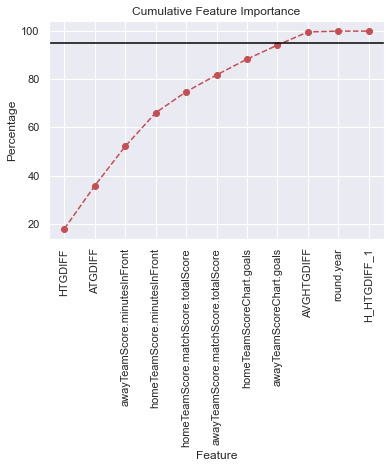

In [15]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#bottom, top = ylim()
bottom = 0
plt.plot(names,cum_values, '--bo', color='r')
# set importance at 95%
plt.axhline(95,color='black')
plt.xticks(rotation=90);
plt.xlabel('Feature'); 
plt.ylabel('Percentage'); 
plt.title('Cumulative Feature Importance');

In [16]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes, labels,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    classes=classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             #rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


<AxesSubplot:title={'center':'Confusion matrix, with normalization'}, xlabel='Predicted label', ylabel='True label'>

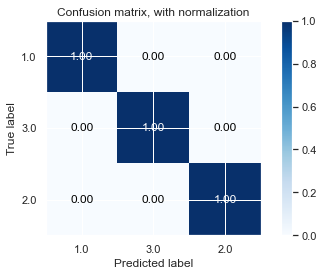

In [17]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=pd.Series(Y).unique(), labels=pd.Series(Y).unique(),
                      title='Confusion matrix, with normalization', normalize=True)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def learning_curve(preds,y_test, model):
    predictions = [round(value) for value in preds]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # retrieve performance metrics
    results = model.evals_result()
    epochs = len(results['validation_0']['merror'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.show()
    # plot classification error
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Classification Error')
    plt.title('XGBoost Classification Error')
    plt.show()

Accuracy: 100.00%


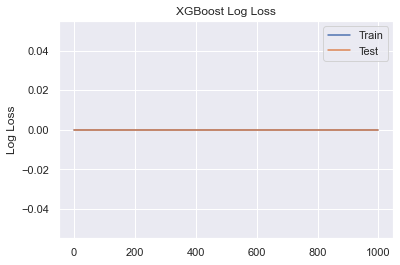

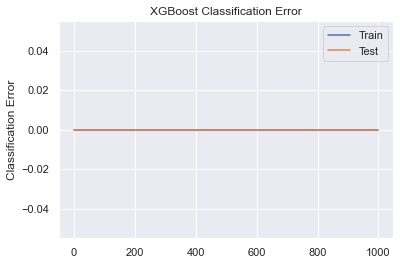

In [19]:
learning_curve(y_pred,y_test,XGB_model)

## Predict Result for Next Games

In [20]:
z_pred = XGB_model.predict(Z)

In [21]:
xgb_df_next_games = df_next_games.copy()

In [22]:
xgb_df_next_games['predicted_result'] = z_pred

In [23]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result
572,Brisbane Lions,Western Bulldogs,2.0
573,Melbourne,Geelong Cats,3.0
574,Port Adelaide,Western Bulldogs,1.0
575,Melbourne,Western Bulldogs,3.0
576,Melbourne,Western Bulldogs,3.0
577,Carlton,Richmond,3.0
578,St Kilda,Collingwood,1.0
579,Geelong Cats,Essendon,3.0
580,GWS Giants,Sydney Swans,1.0
